In [1]:
import numpy as np
import torch 
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
path = '/home/jua/corsika/run/energy_var/npz/square/all/'
filelist = os.listdir(path)
gList = {}
pList = {}
for file in filelist:
    n = int(file.split('_')[2][-1])
    if file.split("_")[0]=='gamma':
        gList[n]=np.load(path+file)
    if file.split("_")[0]=='proton':
        pList[n]=np.load(path+file)

In [3]:
def Draw(image, time, particle, nbin, upperlower):
    x = []
    y = []
    c = []
    s = []

    for i in range(51):
        for j in range(51):
            if image[i][j]!=0:
                x.append(i*5-125)
                y.append(j*5-125)
                c.append(time[i][j])
                s.append(image[i][j]/5)
    
    fig, ax = plt.subplots(figsize=(13,10))
    
    # Draw detertor
    
    #tx = range(-125,125,1)
    #ty = range(-125,125,1)
    #tx,ty = np.meshgrid(tx,ty)
    #ax.scatter(tx,ty,c='black',marker='o',s=0.1)

    ax.set_title("{} ({} pmt)".format(particle,upperlower),fontsize=40,y=1.05)
    ax.set_xlabel("unit [m]",fontsize=30,x=0.9)
    ax.set_ylabel("unit [m]",fontsize=30,labelpad=-20,y=0.87)
    ax.tick_params(axis='both',labelsize=30)

    im = ax.scatter(x,y,cmap='jet', s=s,c=c)
    
    cbar = fig.colorbar(im)
    cbar.ax.tick_params(labelsize=30)
    cbar.set_label("time scale [ns]", rotation=270, fontsize=30, labelpad=40, y=0.8)
    fig.savefig("../plots/image/{}_{}_Bin_{}.pdf".format(particle,upperlower,nbin))
    plt.show()
    '''
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title('{} time distribution'.format(particle))
    ax.set_xlabel("time [ns]")
    #bins = np.arange(min(c),max(c),1e5)
    #bins = np.arange(-300,-200,10)
    #ax.hist(c,bins=bins)
    
    ax.hist(c)
    plt.show()
    '''

In [5]:
nBin = 8

gim = gList[nBin]['image']
pim = pList[nBin]['image']

gim = torch.tensor(gim).float()
pim = torch.tensor(pim).float()

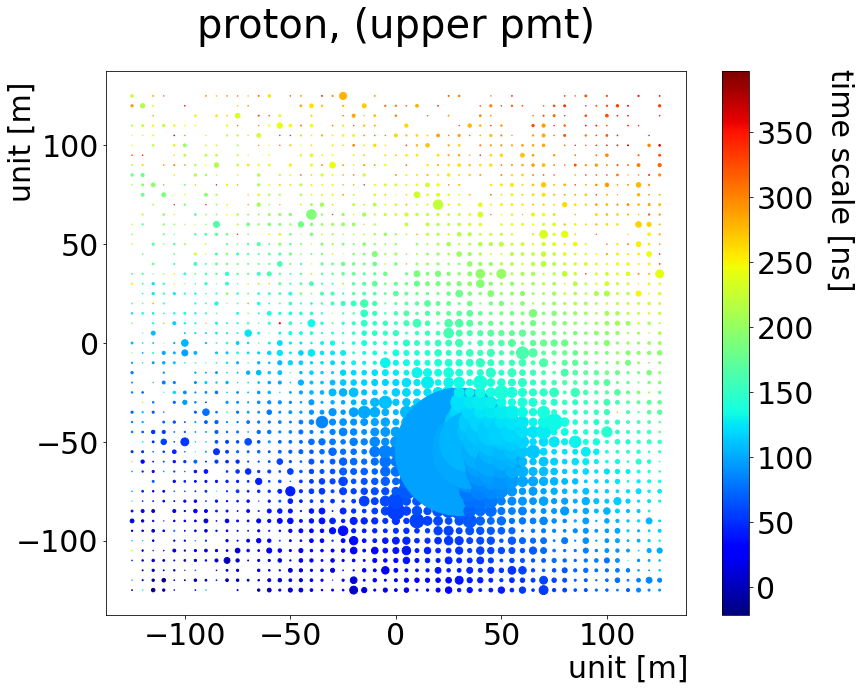

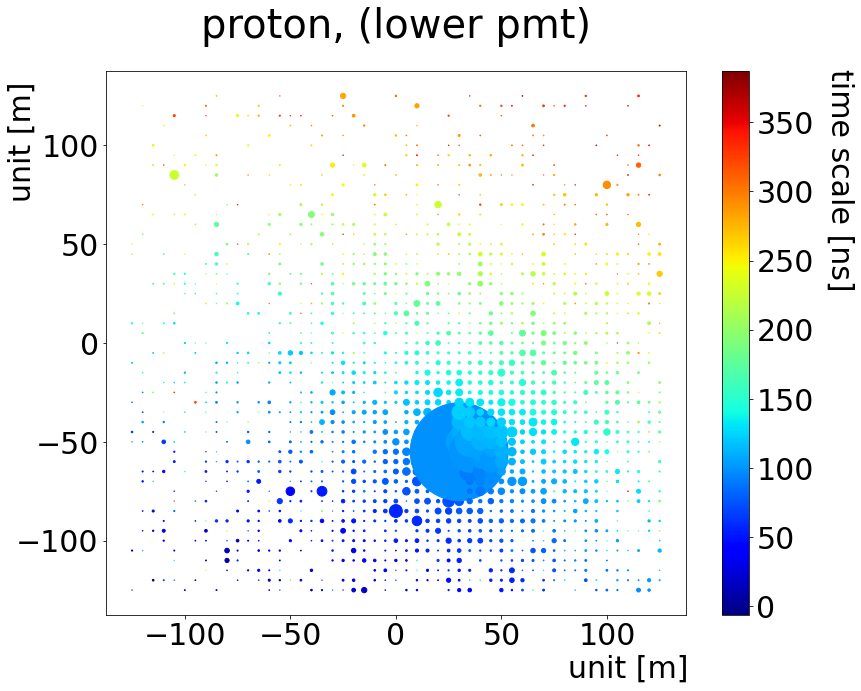

In [108]:
n=9
image1 = np.array(pim[n][0])
time1 = np.array(pim[n][1])
image2 = np.array(pim[n][2])
time2 = np.array(pim[n][3])
Draw(image1,time1,'proton',nBin,'upper')
Draw(image2,time2,'proton',nBin,'lower')

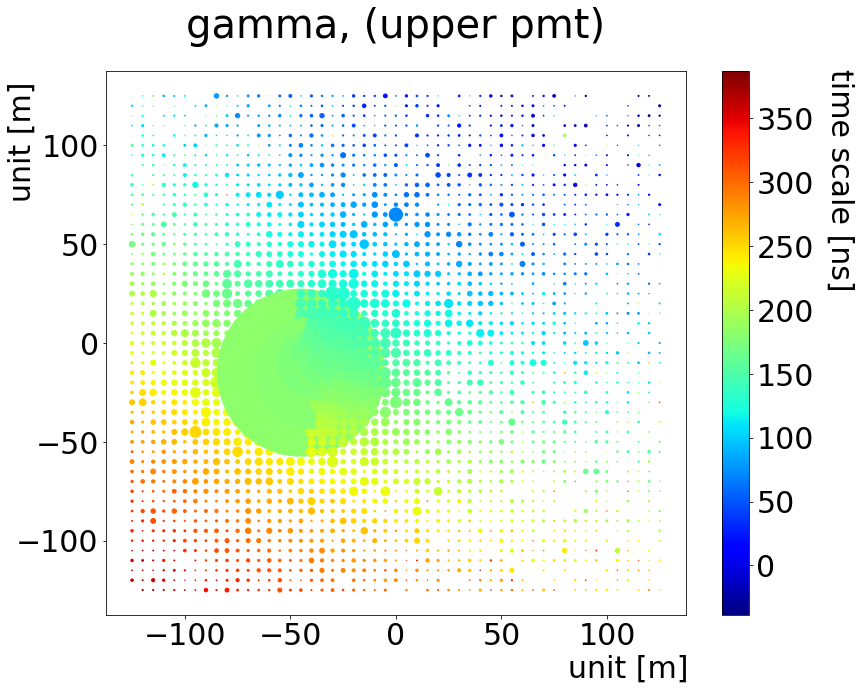

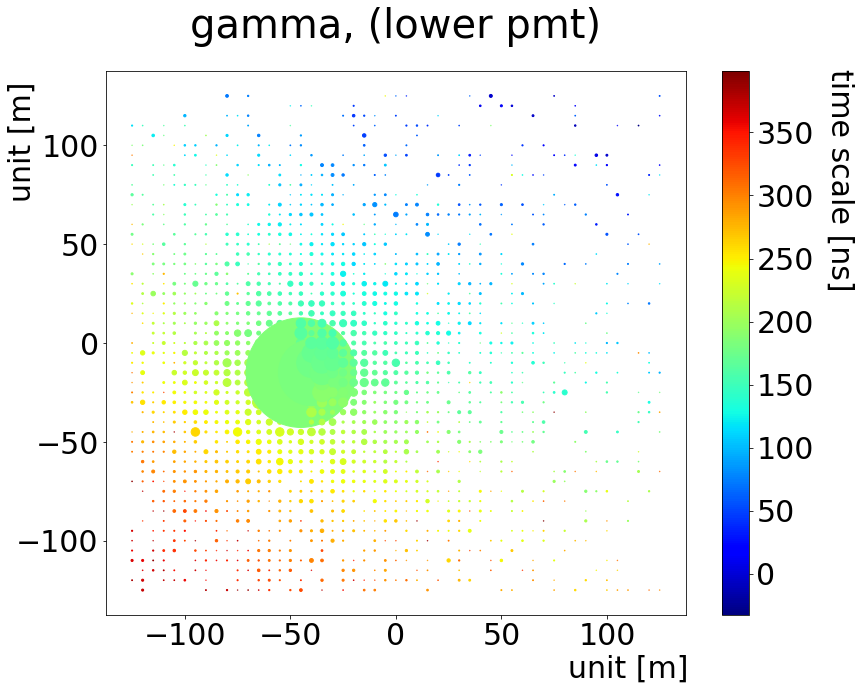

In [109]:
n=1
image1 = np.array(gim[n][0])
time1 = np.array(gim[n][1])
image2 = np.array(gim[n][2])
time2 = np.array(gim[n][3])
Draw(image1,time1,'gamma',nBin,'upper')
Draw(image2,time2,'gamma',nBin,'lower')

In [12]:
nBin = 6

#gim = gList[nBin]['image'][:,1:3:1]
#pim = pList[nBin]['image'][:,1:3:1]

gim = gList[nBin]['image'][:]
pim = pList[nBin]['image'][:]

gim1 = gim[:,0]
gim2 = gim[:,2]
gtime1 = gim[:,1]
gtime2 = gim[:,3]

pim1 = pim[:,0]
pim2 = pim[:,2]
ptime1 = pim[:,1]
ptime2 = pim[:,3]

gim = torch.tensor(gim).float()
pim = torch.tensor(pim).float()

g = []
p = []

In [ ]:
images = gim1
times = gtime1
images = torch.tensor(images).float()
for image,time in zip(images,times):
    for i in range(51):
        for j in range(51):
            if image[i][j]!=0:
                g.append(time[i][j])

In [ ]:
images = pim1
times = ptime1
images = torch.tensor(images).float()
for image,time in zip(images,times):
    for i in range(51):
        for j in range(51):
            if image[i][j]!=0:
                p.append(time[i][j])

In [ ]:
g = torch.tensor(g)
p = torch.tensor(p)
g = g.view(-1)
p = p.view(-1)

fig, ax = plt.subplots(2,figsize=(5,10))
bins = np.arange(-200,500,20)
particle = 'gamma'
ax[0].set_title('{} time distribution'.format(particle))
ax[0].set_xlabel("time [ns]")
ax[0].hist(g,bins=bins)

particle = 'proton'
ax[1].set_title('{} time distribution'.format(particle))
ax[1].set_xlabel("time [ns]")
ax[1].hist(p,bins=bins)

fig.savefig("../plots/time/time_B{}.pdf".format(nBin))
plt.show()